In [31]:
## Import things

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import networkX
import networkx as nx

# Import multiNetX
import multinetx as mx

# Need to save as json
import scipy.io as sio
from networkx.readwrite import json_graph
import json
import pandas as pd

print("Done importing packages :)")

Done importing packages :)


/opt/conda/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


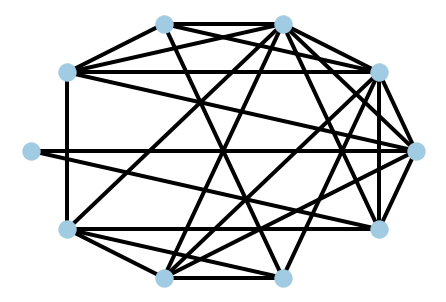

In [32]:
## Make multilayer network with multinetx

nNodes = 10
g1 = mx.generators.erdos_renyi_graph(nNodes,0.5,seed=218)
# g1 is a regular networkx graph
pos1 = nx.circular_layout(g1)
nx.draw(g1, pos1, node_color='#A0CBE2',width=4, edge_cmap=plt.cm.Blues, with_labels=False)
plt.show()

In [33]:
# Make more layers


g2 = mx.generators.erdos_renyi_graph(nNodes,0.5,seed=132)
g3 = mx.generators.erdos_renyi_graph(nNodes,0.5,seed=198)


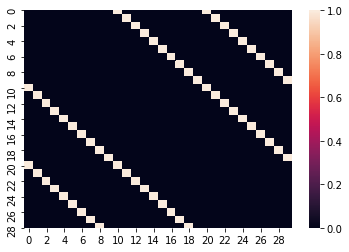

In [34]:
# Define adjacency between layers
adj_block = mx.lil_matrix(np.zeros((nNodes*3,nNodes*3)))


adj_block[0:  nNodes,  nNodes:2*nNodes] = np.identity(nNodes)    # L_12
adj_block[0:  nNodes,2*nNodes:3*nNodes] = np.identity(nNodes)    # L_13
adj_block[nNodes:2*nNodes,2*nNodes:3*nNodes] = np.identity(nNodes)    # L_23

adj_block += adj_block.T

sns.heatmap(adj_block.todense())

In [35]:
# Create multilayer graph
mg = mx.MultilayerGraph(list_of_layers=[g1,g2,g3],
                        inter_adjacency_matrix=adj_block)

In [36]:
# Setting inter/intra layer weights
mg.set_edges_weights(intra_layer_edges_weight=2,
                     inter_layer_edges_weight=3)

# " The object mg inherits all properties from Graph of networkX, so that we can calculate adjacency or Laplacian matrices, their eigenvalues, etc."


/opt/conda/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/opt/conda/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:585: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color) \
/opt/conda/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:595: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  for c in edge_color]):


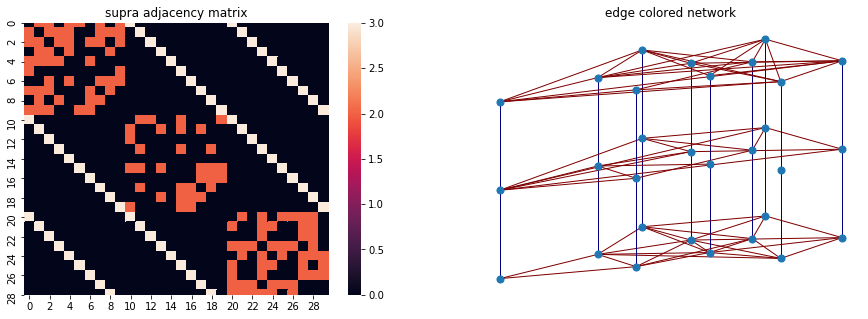

In [63]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(121)
sns.heatmap(mx.adjacency_matrix(mg,weight='weight').todense())
ax1.set_title('supra adjacency matrix')

ax2 = fig.add_subplot(122)
ax2.axis('off')
ax2.set_title('edge colored network')
pos = mx.get_position(mg,mx.fruchterman_reingold_layout(g1),
                      layer_vertical_shift=0.3,
                      layer_horizontal_shift=0.0,
                      proj_angle=47)
mx.draw_networkx(mg,pos=pos,ax=ax2,node_size=50,with_labels=False,
                 edge_color=[mg[a][b]['weight'] for a,b in mg.edges()],
                 edge_cmap=plt.cm.jet_r)
plt.show()

In [64]:
## From the sparse adj, make a networkx graph and add node attributes
G = nx.from_numpy_array(mx.adjacency_matrix(mg,weight='weight').todense())

nLevels = 3
L2_classes = [1,2,3]
## Each node will get attributes L1=node id, L2=slice number, x position, y position, and name/id

id_dict = {i:("id"+str(i)) for i in np.arange(nNodes*nLevels)}
x_dict = {key:float(pos[key][0]) for key in pos}
y_dict = {key:float(pos[key][1]) for key in pos}
L1_dict = {i:str(i) for i in np.arange(nNodes*nLevels)}
L2_dict = {i:1 for i in np.arange(nNodes)}
L2_dict.update({i:2 for i in (np.arange(nNodes)+ nNodes)})
L2_dict.update({i:3 for i in (np.arange(nNodes)+ 2*nNodes)})



# nx.set_node_attributes(G, pos, name="pos")
nx.set_node_attributes(G, id_dict, name = "name")
nx.set_node_attributes(G, x_dict, name = "x")
nx.set_node_attributes(G, y_dict, name = "y")
nx.set_node_attributes(G, L1_dict, name= "L1")
nx.set_node_attributes(G, L2_dict, name= "L2")

# ## Set edge attributes
# edge_dict = {}
# for edge in G.edges():
    
#     edge_dict[edge] = birth_times[max(edge[0],edge[1])]

# edge_dict
# nx.set_edge_attributes(G,edge_dict, name = "birth_time")

## Write to json file

G_json = json_graph.node_link_data(G)
with open('data/mx_test1.json', 'w') as fp:
    json.dump(G_json, fp)

print("done writing file")

done writing file


In [56]:
L2_dict = {i:1 for i in np.arange(nNodes)}
L2_dict.update({i:2 for i in (np.arange(nNodes)+ nNodes)})
L2_dict

{0: 1,
 1: 1,
 2: 1,
 3: 1,
 4: 1,
 5: 1,
 6: 1,
 7: 1,
 8: 1,
 9: 1,
 10: 2,
 11: 2,
 12: 2,
 13: 2,
 14: 2,
 15: 2,
 16: 2,
 17: 2,
 18: 2,
 19: 2}

In [ ]:
mg.edges()

In [ ]:
# All the networkx stuff is just projecting/flattening the mx to a networkx graph then running networkx functions.



In [ ]:
## Next the louvain package

import igraph as ig
import louvain

In [ ]:
G = ig.Graph.Famous('Zachary')
partition = louvain.find_partition(G, louvain.ModularityVertexPartition)
ig.plot(partition) 

In [ ]:
# build an optimizer 
optimiser = louvain.Optimiser()

In [ ]:
# Need to build a few igraph graphs

g1 = ig.Graph.GRG(20, 0.2)
g1_adj = g1.get_adjacency()
g1_adj.shape # Returns matrix ... close

g2 = ig.Graph.GRG(20,0.2)
g3 = ig.Graph.GRG(20,0.3)

# sns.heatmap(g1_adj)

In [ ]:
# community detection
membership, improv = louvain.find_partition_multiplex([g1, g2], louvain.ModularityVertexPartition);
print(membership)

# Then I suppose we'd plot and add colors
# A = g1.get_edgelist()
# G = nx.DiGraph(A) # In case your graph is directed
# G = nx.Graph(A)
# G
color_dict = {0: "blue", 1: "pink", 2:"orange", 3:"yellow" }
g1.vs["color"] = [color_dict[member] for member in membership]
layout = g1.layout("kamada_kawai")
ig.plot(g1,layout=layout)

In [ ]:
partition = louvain.ModularityVertexPartition(G)

In [ ]:
G_pos = ig.Graph.SBM(100, pref_matrix=[[0.5, 0.1], [0.1, 0.5]], block_sizes=[50, 50])
G_neg = ig.Graph.SBM(100, pref_matrix=[[0.1, 0.5], [0.5, 0.1]], block_sizes=[50, 50])
optimiser = louvain.Optimiser()
partition_pos = louvain.ModularityVertexPartition(G_pos)
partition_neg = louvain.ModularityVertexPartition(G_neg)
diff = optimiser.optimise_partition_multiplex(partitions=[partition_pos, partition_neg],layer_weights=[1,-1])